In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [55]:
duplaceted_data = diabetes.duplicated()
duplaceted_data.sum()

10

In [56]:
diabetes = diabetes.drop_duplicates()

In [57]:
diabetes.shape[0]

768

In [58]:
low_information_cols = []

for col in diabetes.columns:
    top_freq = diabetes[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    
    if top_freq > 0.95:
        low_information_cols.append(col)
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        
low_information_cols

['Gender']

In [59]:
diabetes = diabetes.drop(columns=low_information_cols)

In [60]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [61]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [63]:
def func(arg):
    if arg == 0:
        return np.nan
    else:
        return arg

In [64]:
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].applymap(func)

In [70]:
diabetes.isnull().sum() / diabetes.shape[0] * 100 

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [71]:
diabetes = diabetes.drop("Insulin", axis=1)

In [72]:
diabetes.shape[1]

8

In [79]:
cleaned = diabetes.dropna(thresh=diabetes.shape[1]-2 , axis=0)

In [80]:
cleaned.shape[0]

761

In [82]:
cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


In [88]:
values = {'Glucose': cleaned['Glucose'].median(), 'BloodPressure': cleaned['BloodPressure'].median(),
          'SkinThickness': cleaned['SkinThickness'].median(), 'BMI': cleaned['BMI'].median()}

In [89]:
cleaned_df = cleaned.fillna(value=values)

In [90]:
round(cleaned_df['SkinThickness'].mean(),1)

29.1

<AxesSubplot: xlabel='SkinThickness'>

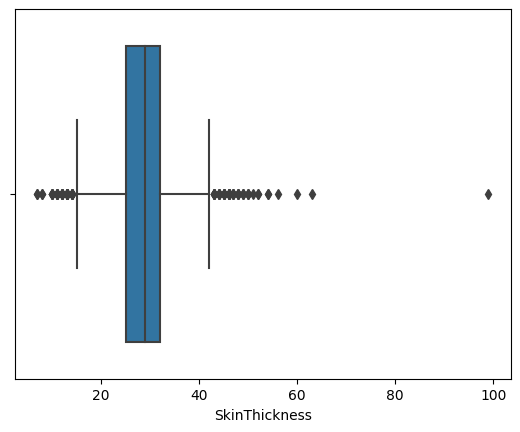

In [92]:
sns.boxplot(cleaned_df, x='SkinThickness')

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

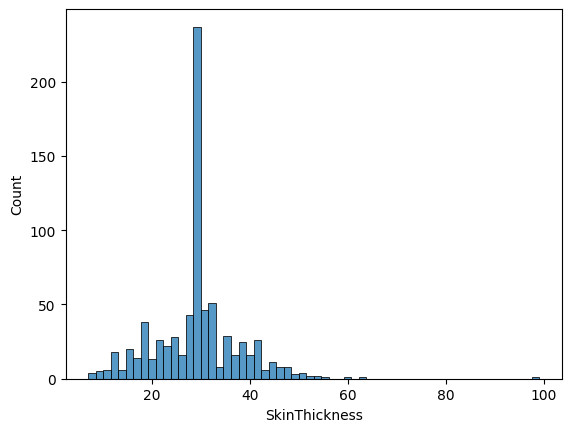

In [93]:
sns.histplot(cleaned_df, x='SkinThickness')

In [94]:
x = cleaned_df['SkinThickness']
quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (1.5 * iqr)
upper_bound = quartile_3 + (1.5 * iqr)
cleaned_data = cleaned_df[(x >= lower_bound) & (x <= upper_bound)]
outliers = cleaned_df[(x > upper_bound) | (x < lower_bound)]

In [95]:
outliers.shape[0]

87

In [96]:
x = cleaned_df['SkinThickness']
mean = x.mean()
std = x.std()
lower_bound = mean - (3 * std)
upper_bound = mean + (3 * std)
cleaned_data = cleaned_df[(x >= lower_bound) & (x <= upper_bound)]
outliers = cleaned_df[(x > upper_bound) | (x < lower_bound)]

In [97]:
outliers.shape[0]

4

In [98]:
x = cleaned_df['DiabetesPedigreeFunction']
quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (1.5 * iqr)
upper_bound = quartile_3 + (1.5 * iqr)
cleaned_data = cleaned_df[(x >= lower_bound) & (x <= upper_bound)]
outliers = cleaned_df[(x > upper_bound) | (x < lower_bound)]
outliers.shape[0]

29

In [99]:
x = np.log(cleaned_df['DiabetesPedigreeFunction'])
quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (1.5 * iqr)
upper_bound = quartile_3 + (1.5 * iqr)
cleaned_data = cleaned_df[(x >= lower_bound) & (x <= upper_bound)]
outliers = cleaned_df[(x > upper_bound) | (x < lower_bound)]
outliers.shape[0]

0